#FPL Data Analysis

This document takes the 2016 Fantasy Premier League data and performs
initial ETL on it. We look at the yearly data first, examining all the
features on the data.  This data contains the final result for all of
2016.

##cleaned_players.csv

The cleaned_players file is post processed file analyzed by vaastav.
Vaastav is the owner of the github account where this data comes from.
Note that this data is a little too clean, loosing some of the features
we are looking for. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"

players_2016 = pd.read_csv('data/2016-17/cleaned_players.csv')

type(players_2016)

idx = players_2016.index
shape = players_2016.shape
cols = players_2016.columns

print (idx, shape)
print (cols)



RangeIndex(start=0, stop=683, step=1) (683, 17)
Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent'],
      dtype='object')


In [2]:
players_2016.head()



,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
0,David,Ospina,0,0,2,143,4,0.0,28.8,0,0,18,2.9,0,0,0,0.2
1,Petr,Cech,0,0,134,3097,37,0.1,819.8,0,2,660,82.0,12,0,2,13.7
2,Laurent,Koscielny,2,1,121,2821,37,53.9,831.2,239,19,723,112.7,10,1,4,11.2
3,Per,Mertesacker,0,0,1,38,1,0.1,17.8,0,0,5,1.8,0,0,0,0.2
4,Gabriel Armando,de Abreu,0,0,45,1517,18,84.5,295.8,119,2,296,50.0,5,0,6,0.8


In [3]:
players_2016.tail()


,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
678,Sam,Surridge,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
679,Angel,Gomes,0,0,1,3,0,3.8,0.8,0,0,2,0.5,0,0,0,0.0
680,Kieran,O'Hara,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
681,Gerhard,Tremmel,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
682,Rene,Gilmartin,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0


##players_raw

Players_raw file contains the raw information pulled from the FPL API.  Note the large number
of features on this file.  Also note that this file is a snapshot of time, which at this point 
is a snapshot at the end of the 2016 season. 

In [4]:
players_raw_2016 = pd.read_csv('data/2016-17/players_raw.csv', index_col='id')

players_raw_2016.columns


Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'in_dreamteam',
       'influence', 'loaned_in', 'loaned_out', 'loans_in', 'loans_out',
       'minutes', 'news', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_saved', 'photo', 'points_per_game', 'red_cards', 'saves',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'threat', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'yellow_cards'],
      dtype='object')

In [5]:
players_raw_2016.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1 to 683
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       683 non-null    int64  
 1   bonus                         683 non-null    int64  
 2   bps                           683 non-null    int64  
 3   chance_of_playing_next_round  683 non-null    object 
 4   chance_of_playing_this_round  683 non-null    object 
 5   clean_sheets                  683 non-null    int64  
 6   code                          683 non-null    int64  
 7   cost_change_event             683 non-null    int64  
 8   cost_change_event_fall        683 non-null    int64  
 9   cost_change_start             683 non-null    int64  
 10  cost_change_start_fall        683 non-null    int64  
 11  creativity                    683 non-null    float64
 12  dreamteam_count               683 non-null    int64  
 13  ea_in

In [6]:
players_raw_2016.head()


,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,18,100,100,0,48844,0,0,-3,...,0.0,2,3433,0,7905,0,0.0,0.4,Ospina,0
2,0,2,660,100,100,12,11334,0,0,-1,...,0.0,134,432837,0,590727,0,0.0,24.8,Cech,2
3,1,19,723,0,75,10,51507,0,0,1,...,239.0,121,965040,0,857277,0,0.0,19.8,Koscielny,4
4,0,0,5,100,100,0,17127,0,0,-2,...,0.0,1,2141,0,5912,0,0.0,0.2,Mertesacker,0
5,0,2,296,75,100,5,158074,0,0,-2,...,119.0,45,119600,0,100361,0,0.0,9.4,Gabriel,6


## Cleanup Players Raw

This is an initial attempt to cleanup the raw players table. We start
by simply removing any players that did not receive any points at all.
For actual machine learning this is a suspicious step.  Once we start
attempting to run the recommendation engine, we may be running it
after the first week of games and there may be many players with no
points. We will make some comparisons below to see if the intuition is
correct or not.

In [7]:
players_clean=players_raw_2016[players_raw_2016['bps'] != 0]
players_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1 to 680
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       523 non-null    int64  
 1   bonus                         523 non-null    int64  
 2   bps                           523 non-null    int64  
 3   chance_of_playing_next_round  523 non-null    object 
 4   chance_of_playing_this_round  523 non-null    object 
 5   clean_sheets                  523 non-null    int64  
 6   code                          523 non-null    int64  
 7   cost_change_event             523 non-null    int64  
 8   cost_change_event_fall        523 non-null    int64  
 9   cost_change_start             523 non-null    int64  
 10  cost_change_start_fall        523 non-null    int64  
 11  creativity                    523 non-null    float64
 12  dreamteam_count               523 non-null    int64  
 13  ea_in

In [8]:
points = players_clean['bps'] 
points.describe(percentiles=[.10, .30, .50, .80, .90])


count    523.000000
mean     277.405354
std      219.424212
min        1.000000
10%       17.000000
30%      114.600000
50%      236.000000
80%      499.600000
90%      595.200000
max      920.000000
Name: bps, dtype: float64

In [9]:
# Let's try and learn about the top 10% players_2016
top_points = players_clean[players_clean['bps'] > 499.6]
top_points.describe()



,assists,bonus,bps,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,...,team_code,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,yellow_cards
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.0,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,1.050000e+02,105.0,1.050000e+02,105.0,105.0,105.000000,105.000000
mean,3.800000,12.571429,615.819048,10.361905,53850.038095,0.0,0.0,0.342857,-0.342857,459.353333,...,32.933333,475.276190,128.590476,7.672204e+05,0.0,7.008864e+05,0.0,0.0,21.166667,4.723810
std,4.263891,7.751994,93.117975,3.162654,31937.796479,0.0,0.0,3.474712,3.474712,408.679229,...,34.705427,475.241305,38.233266,8.329226e+05,0.0,7.614797e+05,0.0,0.0,3.397841,3.120944
min,0.000000,0.000000,500.000000,3.000000,6744.000000,0.0,0.0,-7.000000,-11.000000,0.000000,...,1.000000,0.000000,80.000000,1.474300e+04,0.0,1.158400e+04,0.0,0.0,13.800000,0.000000
25%,0.000000,7.000000,543.000000,8.000000,37572.000000,0.0,0.0,-2.000000,-2.000000,102.200000,...,8.000000,152.000000,102.000000,1.743750e+05,0.0,1.829280e+05,0.0,0.0,18.800000,2.000000
50%,3.000000,10.000000,596.000000,10.000000,49579.000000,0.0,0.0,0.000000,0.000000,426.600000,...,14.000000,294.000000,120.000000,5.208340e+05,0.0,4.372190e+05,0.0,0.0,21.300000,4.000000
75%,6.000000,16.000000,660.000000,13.000000,74033.000000,0.0,0.0,2.000000,2.000000,687.900000,...,56.000000,639.000000,144.000000,1.016747e+06,0.0,1.012775e+06,0.0,0.0,23.800000,6.000000
max,21.000000,33.000000,920.000000,17.000000,197365.000000,0.0,0.0,11.000000,7.000000,1702.000000,...,110.000000,1896.000000,264.000000,4.044050e+06,0.0,3.691225e+06,0.0,0.0,29.200000,14.000000


##BPS - The Bonus Point System
BPS is a very important computed metric. 

[How BPS Works](https://www.premierleague.com/this-is-pl/the-football/106533#:~:text=Bonus%20points%20are%20a%20key,performance%20score%20for%20every%20player)

In [10]:
bps=players_clean['bps']
bps.describe()


count    523.000000
mean     277.405354
std      219.424212
min        1.000000
25%       80.500000
50%      236.000000
75%      442.000000
max      920.000000
Name: bps, dtype: float64

##Team

A team is potentially an important way to determine the number of
points a player gets.  Take a very successful team, in theory the sum
is greater than the parts, which means that taking a few players from
a successful team is better than a non successful team.  This is not
univerally true. Top teams may have stars that sit on the bench
depending on matchup, and if you pick a star that doesn't play, you
loose points.

The analysis below attempts to get to the question about whether there
is any correlation between team and points.


In [11]:
players_clean["team"].value_counts().sort_index()



1     27
2     26
3     26
4     24
5     30
6     26
7     26
8     24
9     23
10    24
11    30
12    27
13    25
14    26
15    29
16    27
17    23
18    31
19    21
20    28
Name: team, dtype: int64

## Team Code vs Team 

We scraped the data on the premier league to figure out the position
that the team finished at the end of the year, and we compared to the
data we found on players_raw.

Using the scraped data below I tried to figure out how to determine
the current position of a team in the league, turns out this was
simple, it is the 'team' column. Notice on the output below,
team=pos-1

So duh! Drop the concept of scraping the website to get the position
of the team.

OK, so the 'team_code' identifies the individual team, like Arsenal,
and the 'team' identifies the position this season.

In [12]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

my_url="https://www.premierleague.com/history/season-reviews/54"
uClient = uReq(my_url)
page_html = uClient.read()

uClient.close()

page_soup = soup(page_html, "html.parser")

teamList = []
divTeams = page_soup.find("div", {"class":"table tableSmall homeStandings js-standings-entry-container"})
teams = divTeams.findAll("tr")
for t in teams:
    try:
        teamList.append(int(t['data-filtered-table-row']))
        # t['data-filtered-table-row-name'])
    finally:
        continue

print(teamList)
    

[4, 21, 11, 10, 1, 12, 7, 20, 127, 36, 25, 26, 42, 6, 45, 43, 33, 41, 13, 29]


In [13]:
# Now do a join between the position the team finished and the players

praw = pd.read_csv('data/2016-17/players_raw.csv', index_col='id')

pj = praw.join(teamDF, on='team', rsuffix='tl')
#pj[["team_code", "team", "total_points", "pos"]].groupby('team')['pos'].tail(20)
column_names = ['team']
summaries = {'pos': 'mean'}
pj_summary = pj.groupby(by=column_names).agg(summaries).reset_index()
pj_summary


NameError: name 'teamDF' is not defined

##Team vs points

So we plot to see if there is a relationship between team_code and/or
team position and bps, or points. At least by simple visual inspection
there doesn't appear to be any relationship.

Please see the four scatter plots below.  At least at this level of
analysis it does not appear to follow that a player in a team closer
to the top will automatically score better than one at the bottom.

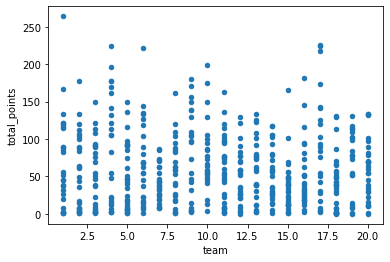

In [14]:
players_clean.plot(kind="scatter", x='team', y='total_points')
plt.show()


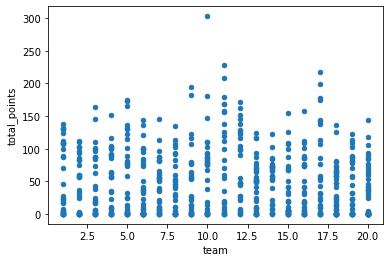

In [15]:
players_raw_2017 = pd.read_csv('data/2017-18/players_raw.csv', index_col='id')
players_raw_2017.plot(kind="scatter", x='team', y='total_points')
plt.show()


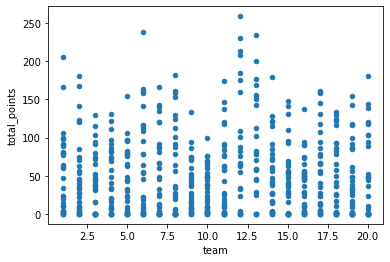

In [16]:
players_raw_2018 = pd.read_csv('data/2018-19/players_raw.csv', index_col='id')
players_raw_2018.plot(kind="scatter", x='team', y='total_points')
plt.show()


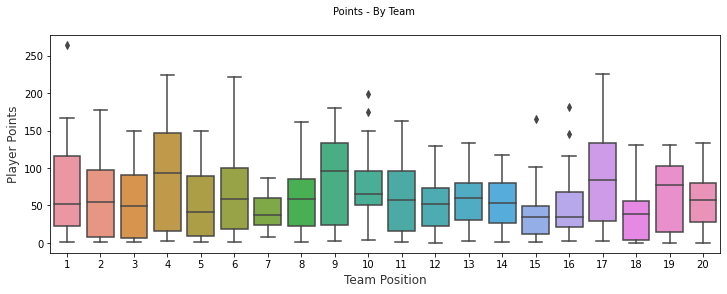

In [17]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Points - By Team', fontsize=10)

sns.boxplot(x="team", y="total_points", data=players_clean,  ax=ax)
ax.set_xlabel("Team Position",size = 12,alpha=0.8)
ax.set_ylabel("Player Points",size = 12,alpha=0.8)

plt.show()


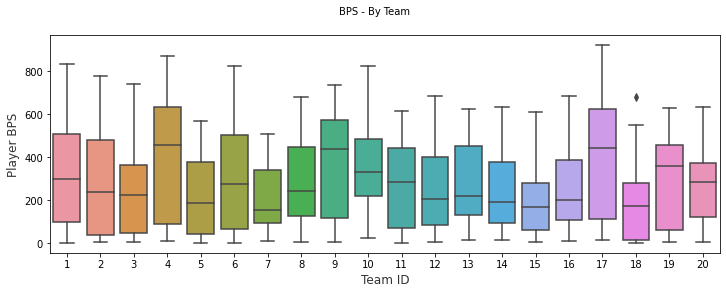

In [18]:
# Box Plots BPS
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('BPS - By Team', fontsize=10)

sns.boxplot(x="team", y="bps", data=players_clean,  ax=ax)
ax.set_xlabel("Team ID",size = 12,alpha=0.8)
ax.set_ylabel("Player BPS",size = 12,alpha=0.8)

plt.show()


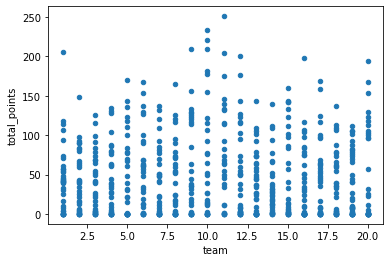

In [19]:
players_raw_2020 = pd.read_csv('data/2019-20/players_raw.csv', index_col='id')
players_raw_2020.plot(kind="scatter", x='team', y='total_points')
plt.show()


## Column Usefulness

After doing many passes of analysis the following features are likely
to be useful.  Running a correlation plot helped identified cold
columns. The columns that remain on this list are probably interesting
to keep as features.

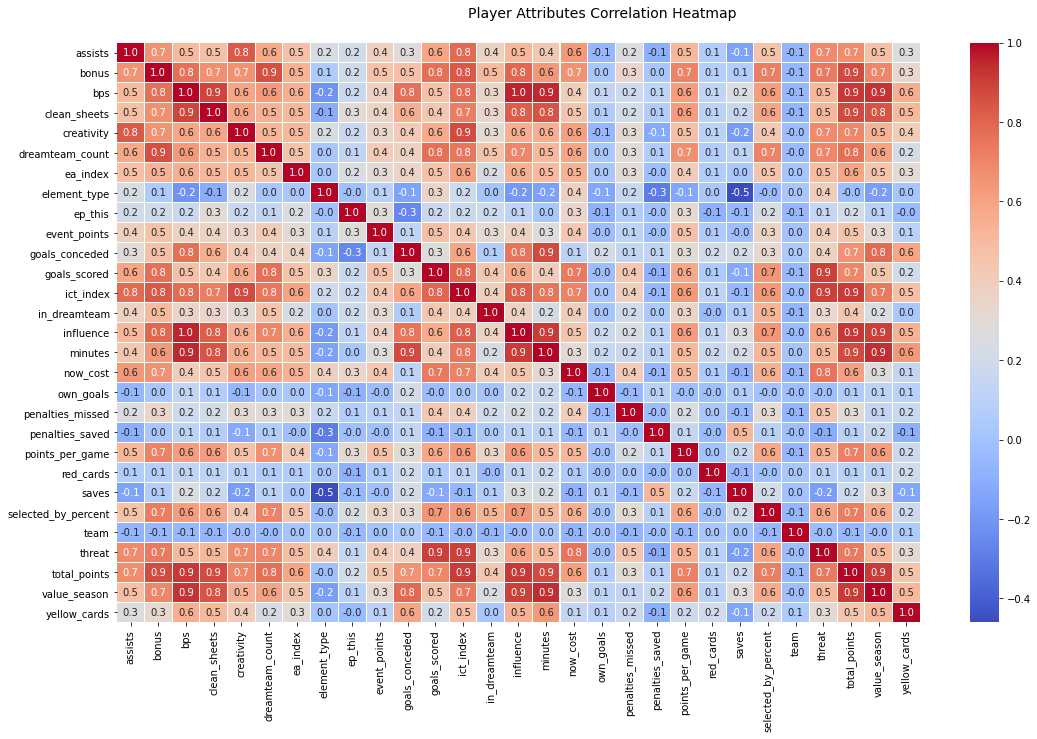

In [20]:
# Analysis of column usefulness

useful_columns = ['assists',
                  'bonus',
                  'bps',
#                  'chance_of_playing_next_round',
#                  'chance_of_playing_this_round',
                  'clean_sheets',
#                  'code',
#                  'cost_change_event',
#                  'cost_change_event_fall',
#                  'cost_change_start',
#                  'cost_change_start_fall',
                  'creativity',
                  'dreamteam_count',
                  'ea_index',
                  'element_type',
                  'ep_next',
                  'ep_this',
                  'event_points',
#                  'form',
                  'goals_conceded',
                  'goals_scored',
                  'ict_index',
#                  'id',
                  'in_dreamteam',
                  'influence',
                  'minutes',
                  'now_cost',
                  'own_goals',
                  'penalties_missed',
                  'penalties_saved',
                  'points_per_game',
                  'red_cards',
                  'saves',
                  'selected_by_percent',
#                  'special',
                  'squad_number',
                  'status',
                  'team',
#                  'team_code',
                  'threat',
                  'total_points',
#                  'transfers_in',
#                  'transfers_in_event',
#                  'transfers_out',
#                  'transfers_out_event',
#                  'value_form',
                  'value_season',
                  'yellow_cards']

f, ax = plt.subplots(figsize=(18, 10))
players_features = players_clean[useful_columns]
corr = players_features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Player Attributes Correlation Heatmap', fontsize=14)

    

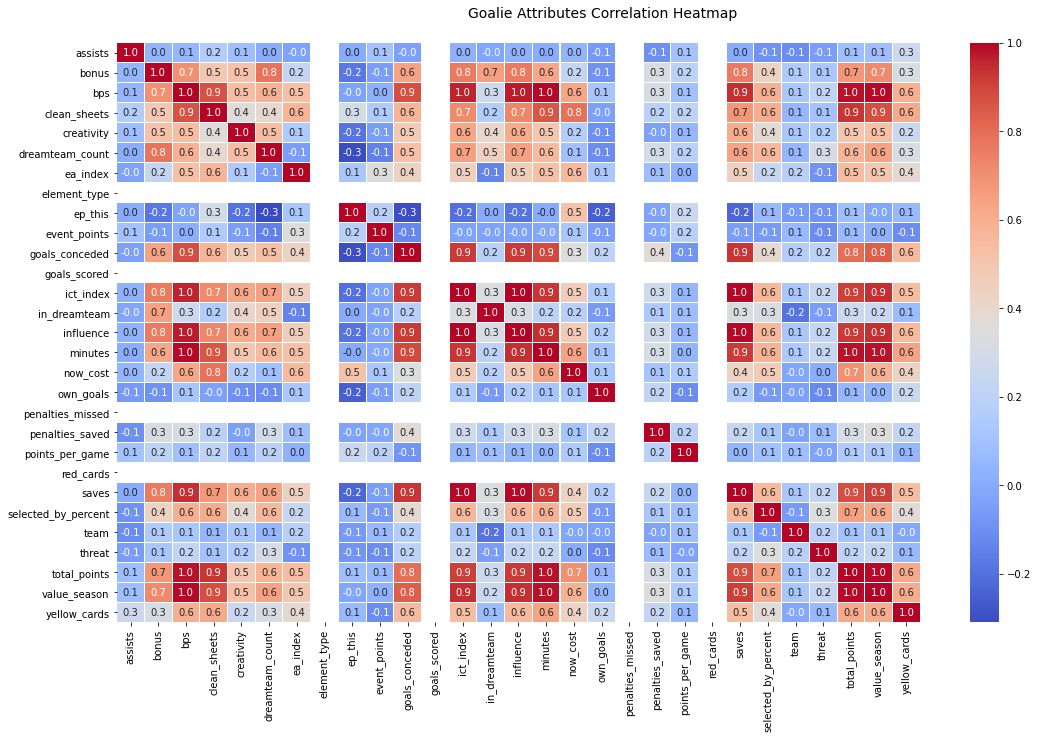

In [21]:
f, ax = plt.subplots(figsize=(18, 10))
players_features = players_clean[useful_columns]
corr = players_features[players_features.element_type == 1].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Goalie Attributes Correlation Heatmap', fontsize=14)


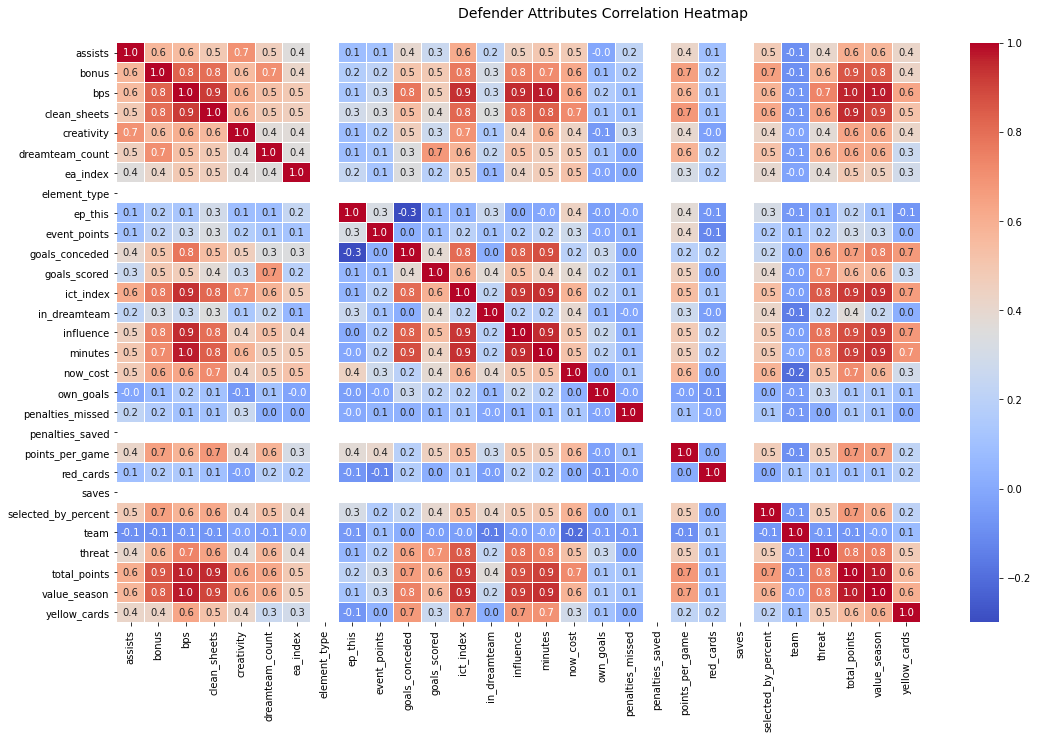

In [22]:
f, ax = plt.subplots(figsize=(18, 10))
players_features = players_clean[useful_columns]
corr = players_features[players_features.element_type == 2].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Defender Attributes Correlation Heatmap', fontsize=14)


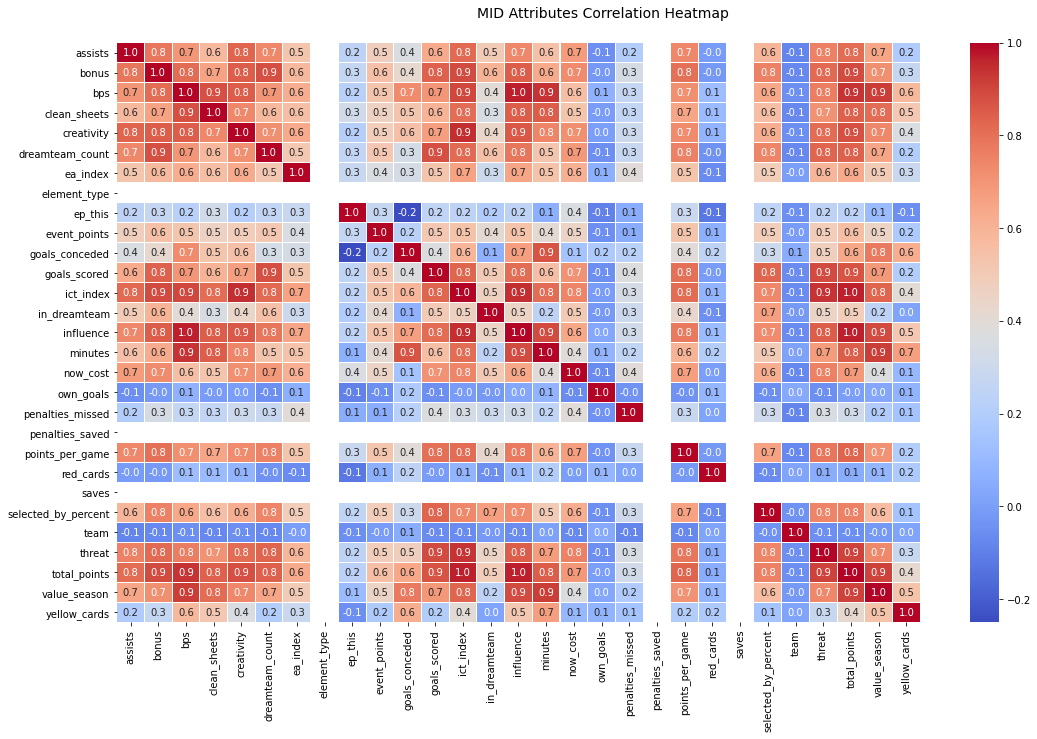

In [23]:
f, ax = plt.subplots(figsize=(18, 10))
players_features = players_clean[useful_columns]
corr = players_features[players_features.element_type == 3].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('MID Attributes Correlation Heatmap', fontsize=14)


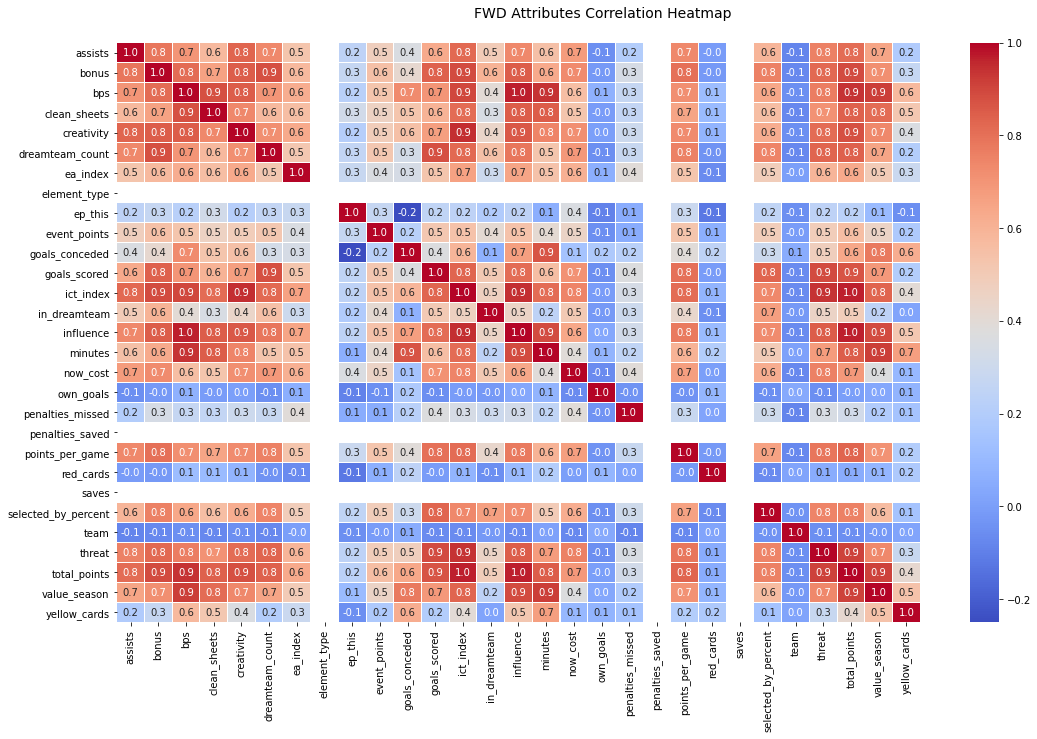

In [24]:
f, ax = plt.subplots(figsize=(18, 10))
players_features = players_clean[useful_columns]
corr = players_features[players_features.element_type == 3].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('FWD Attributes Correlation Heatmap', fontsize=14)


## Team Code vs points

Team code shouldn't have anything to do with with points, but check in
case.  The x-axis is uneven because the code is historical, thus older
teams have codes under 20, newer teams have higher codes.  We will drop
team_code. 

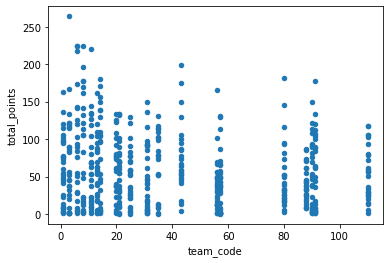

In [25]:
players_clean.plot(kind="scatter", x='team_code', y='total_points')
plt.show()


## Correlations

The relationship between BPS and points is not immediately apparent to
be linear. The documentation for fpl says that points are calculated for the top
BPS. This (I suppose) creates a little randomness to make things a bit
harder to compute, that is because they are the top players on each
game.  It means that top players in games between two bad teams can
also get lots of points.

The best 6 players in a game will get points.  I suspect it is better
to drop one of these two features, but I don't know which yet. The
following boxplots make a case for dropping total_points.

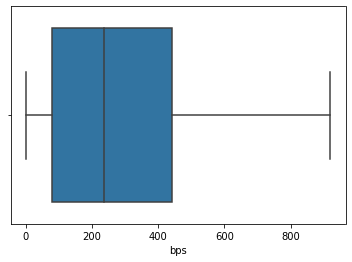

In [26]:
ax = sns.boxplot(x=players_clean["bps"])

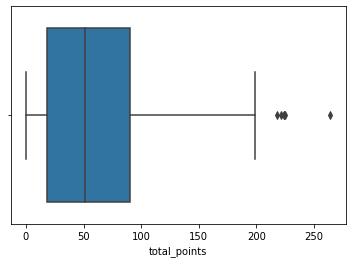

In [27]:
ax = sns.boxplot(x=players_clean["total_points"])

/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


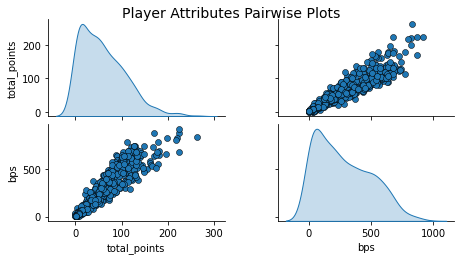

In [28]:
cols = ['total_points', 'bps']
pp = sns.pairplot(players_clean[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Player Attributes Pairwise Plots', fontsize=14)


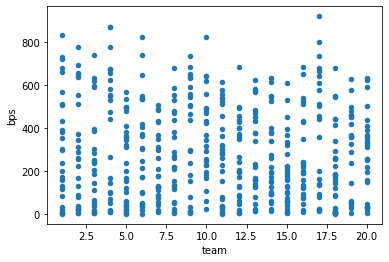

In [29]:
players_clean.plot(kind="scatter", x='team', y='bps')
plt.show()


## Element Type : Position

Element type is the position a player has on the team. It is a
category feature.  (1-Goalie, 2-Defender, 3-Mid, 4-Forward).
Midfielders have the most potential for high scoring, they are also
most expensive, and have a great deal of variance.

In [30]:
# This is the position of the player  GKP, DEF, MID, FWD
players_clean["element_type"].value_counts()


3    231
2    168
4     82
1     42
Name: element_type, dtype: int64

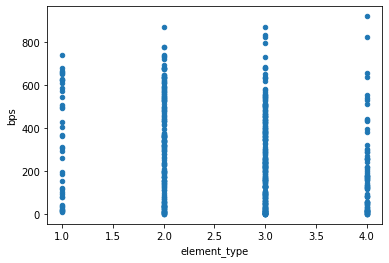

In [31]:
players_clean.plot(kind="scatter", x='element_type', y='bps')
plt.show()


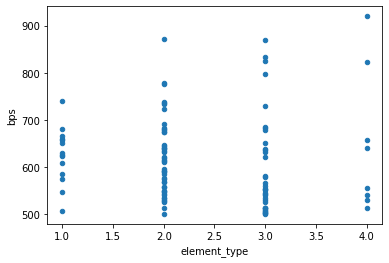

In [32]:
top_points.plot(kind="scatter", x='element_type', y='bps')
plt.show()


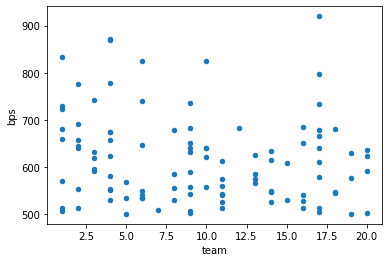

In [33]:
top_points.plot(kind="scatter", x='team', y='bps')
plt.show()

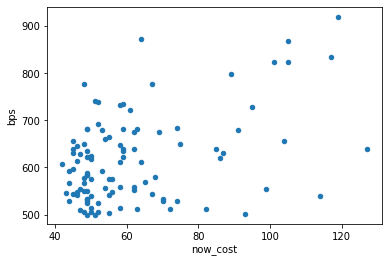

In [34]:
top_points.plot(kind="scatter", x='now_cost', y='bps')
plt.show()

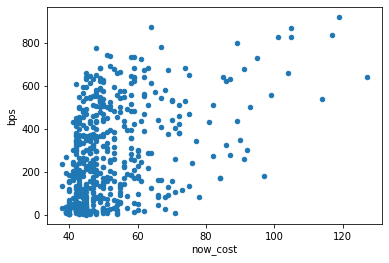

In [35]:
players_clean.plot(kind="scatter", x='now_cost', y='bps')
plt.show()

In [36]:
# Now construct a DF 
posList = [x for x in range(1,21)]
list_labels = ['team', 'pos']
list_cols = [teamList, posList]
zipped = list(zip(list_labels, list_cols))
data = dict(zipped)

teamDF = pd.DataFrame(data)
print(teamDF)




    team  pos
0      4    1
1     21    2
2     11    3
3     10    4
4      1    5
5     12    6
6      7    7
7     20    8
8    127    9
9     36   10
10    25   11
11    26   12
12    42   13
13     6   14
14    45   15
15    43   16
16    33   17
17    41   18
18    13   19
19    29   20


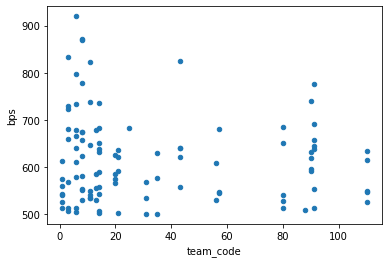

In [37]:
top_points.plot(kind="scatter", x='team_code', y='bps')
plt.show()


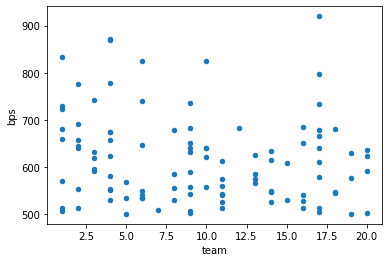

In [38]:
top_points.plot(kind="scatter", x='team', y='bps')
plt.show()


/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


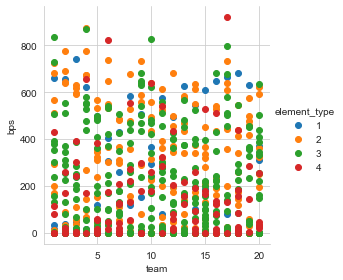

In [39]:

sns.set_style("whitegrid")
sns.FacetGrid(praw, hue="element_type", size=4).map(plt.scatter, "team", "bps").add_legend()


/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


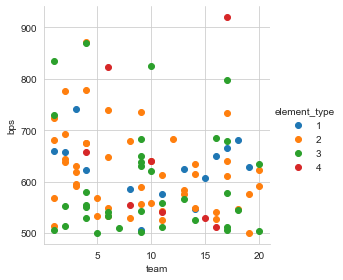

In [40]:
sns.FacetGrid(top_points, hue="element_type", size=4).map(plt.scatter, "team", "bps").add_legend()


/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


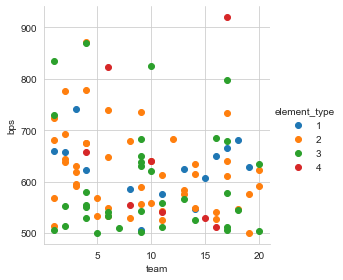

In [41]:
sns.FacetGrid(top_points, hue="element_type", size=4).map(plt.scatter, "team", "bps").add_legend()
